In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from icecream import ic

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


#### Import key API code idea from Nicole Lund. Shared in UofA-PHX-VIRT-DATA-PT-03-2021, Slack: Resources Channel

In [114]:

# Import API key
from api_keys import weather_api_key
if weather_api_key == "YOUR KEY HERE!":
    import sys
    sys.path.append(r"/Users/rosaicelaroman/Desktop/Data_BootCamp/APIs/config_keys/")
    from api_keys_v2 import weather_api_key


In [116]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [117]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


618

#### Created base URL and established the units. Also created the dataframe where data will be stored.

In [118]:

base_url = "http://api.openweathermap.org/data/2.5/weather?q="
units = 'metric'
weather_df=pd.DataFrame({'cities': cities})

weather_df.head()

,cities
0,alofi
1,attawapiskat
2,bredasdorp
3,kungurtug
4,cairo


#### Initiated the rest of the columns for the dataframe

In [119]:
weather_df['lat'] = ""
weather_df['lng'] = ""
weather_df['temp'] = ""
weather_df['humidity'] = ""
weather_df['cloudiness'] = ""
weather_df['wind'] = ""
weather_df.head()

,cities,lat,lng,temp,humidity,cloudiness,wind
0,alofi,,,,,,
1,attawapiskat,,,,,,
2,bredasdorp,,,,,,
3,kungurtug,,,,,,
4,cairo,,,,,,


#### For loop to iterate the datafame rows and populate them with the data from the response. The exception also populates the empty column values with NaN values.

In [125]:
for index, row in weather_df.iterrows():
    # count+=1
    city = row['cities']
    print(f'Retrieving results for Index {index}: {city}')
    try:
        response = requests.get(base_url+city+"&units="+units+'&appid=' + weather_api_key).json()
        weather_df.loc[index, 'lat'] = response['coord']['lat']
        weather_df.loc[index, 'lng'] = response['coord']['lon']
        weather_df.loc[index, 'temp'] = response['main']['temp']
        weather_df.loc[index, 'humidity'] = response['main']['humidity']
        weather_df.loc[index, 'cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'wind'] = response['wind']['speed']
     
        cities_found.append(city)
        print(f'Found city: {city}')
    except:
        print(f"Missing city: {city}... Skipping")
        weather_df.loc[index, 'lat'] = float('NaN')
        weather_df.loc[index, 'lng'] = float('NaN')
        weather_df.loc[index, 'temp'] = float('NaN')
        weather_df.loc[index, 'humidity'] = float('NaN')
        weather_df.loc[index, 'cloudiness'] = float('NaN')
        weather_df.loc[index, 'wind'] = float('NaN')
    print(f'--------------------')
    # if count==10:
    # print(count)
    # break

Retrieving results for Index 0: alofi
Found city: alofi
--------------------
Retrieving results for Index 1: attawapiskat
Missing city: attawapiskat... Skipping
--------------------
Retrieving results for Index 2: bredasdorp
Found city: bredasdorp
--------------------
Retrieving results for Index 3: kungurtug
Found city: kungurtug
--------------------
Retrieving results for Index 4: cairo
Found city: cairo
--------------------
Retrieving results for Index 5: ushuaia
Found city: ushuaia
--------------------
Retrieving results for Index 6: nyurba
Found city: nyurba
--------------------
Retrieving results for Index 7: dingzhou
Found city: dingzhou
--------------------
Retrieving results for Index 8: lompoc
Found city: lompoc
--------------------
Retrieving results for Index 9: tuktoyaktuk
Found city: tuktoyaktuk
--------------------
Retrieving results for Index 10: marcona
Missing city: marcona... Skipping
--------------------
Retrieving results for Index 11: kamenskoye
Missing city: kame

In [126]:
weather_df.head()

,cities,lat,lng,temp,humidity,cloudiness,wind
0,alofi,-19.0595,-169.919,30,70,18,5.14
1,attawapiskat,NaN,NaN,NaN,NaN,NaN,NaN
2,bredasdorp,-34.5322,20.0403,15,94,100,3.09
3,kungurtug,50.5994,97.5228,-3.57,89,100,1.17
4,cairo,30.0626,31.2497,16.83,72,0,6.69


#### Drop rows with na values that were added in the dataframe above.

In [127]:
weather_df.dropna(inplace=True)
weather_df.head(20)

,cities,lat,lng,temp,humidity,cloudiness,wind
0,alofi,-19.0595,-169.919,30,70,18,5.14
2,bredasdorp,-34.5322,20.0403,15,94,100,3.09
3,kungurtug,50.5994,97.5228,-3.57,89,100,1.17
4,cairo,30.0626,31.2497,16.83,72,0,6.69
5,ushuaia,-54.8,-68.3,7,53,20,2.06
6,nyurba,63.2842,118.332,-5.48,72,100,2.94
7,dingzhou,38.5131,114.996,16,72,40,2
8,lompoc,34.6391,-120.458,9.75,76,85,4.63
9,tuktoyaktuk,69.4541,-133.037,-11,79,90,6.69
12,burns lake,54.2331,-125.753,17,20,84,3.6


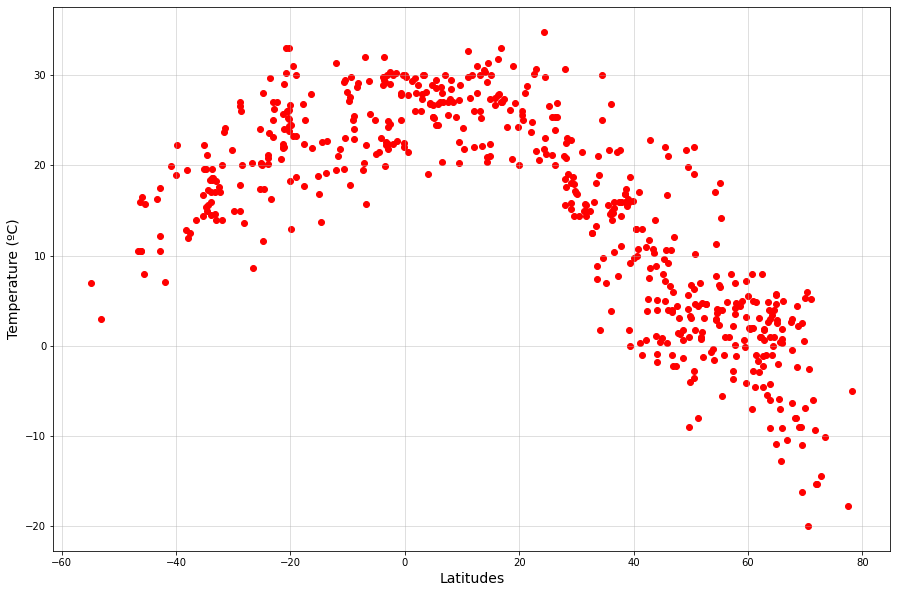

In [146]:
plt.figure(figsize=(15,10))
y_axis = weather_df['temp']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='r')
plt.grid(True, alpha=0.5)
plt.ylabel('Temperature (ºC)', size=14)
plt.xlabel('Latitudes', size=14)
plt.show()

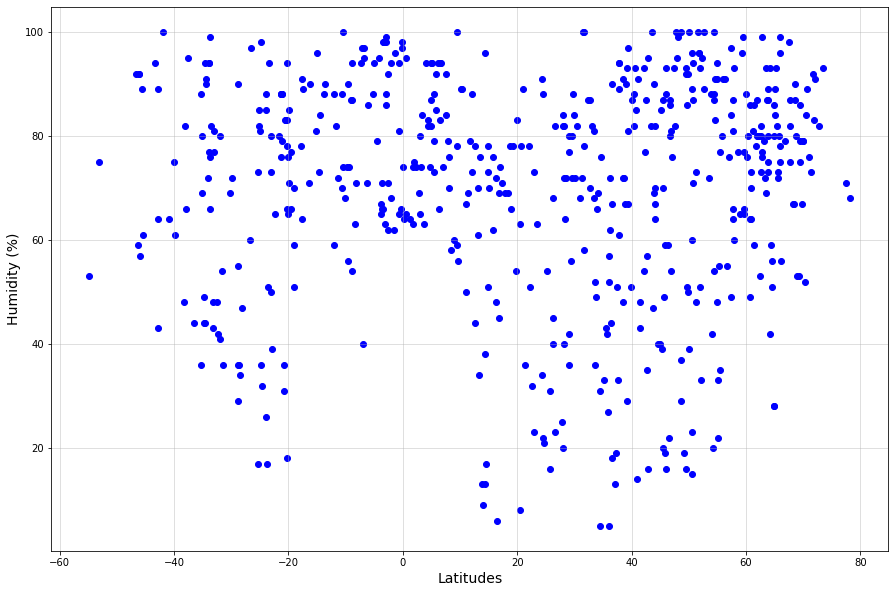

In [145]:
plt.figure(figsize=(15,10))
y_axis = weather_df['humidity']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='b')
plt.grid(True, alpha=0.5)
plt.ylabel('Humidity (%)', size=14)
plt.xlabel('Latitudes', size=14)
plt.show()

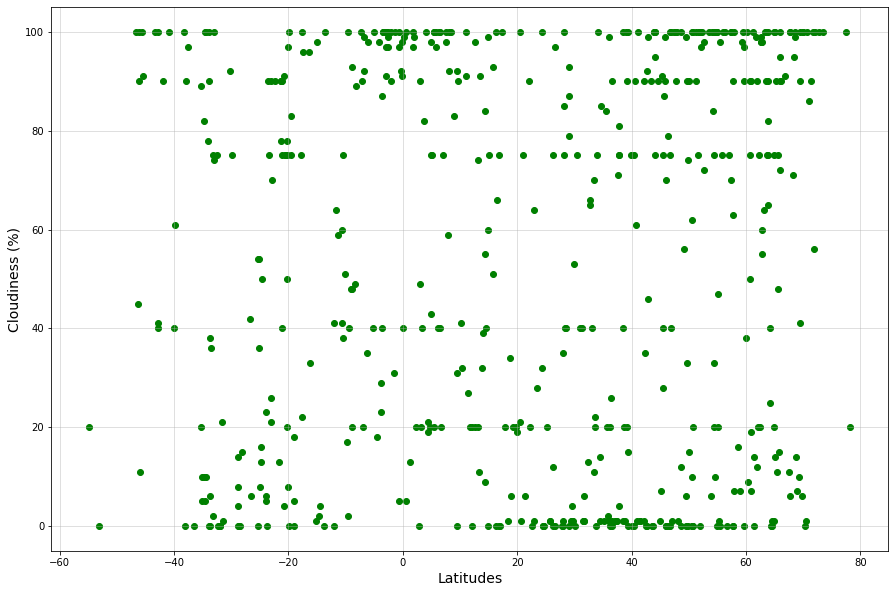

In [144]:
plt.figure(figsize=(15,10))
y_axis = weather_df['cloudiness']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='g')
plt.grid(True, alpha=0.5)
plt.ylabel('Cloudiness (%)', size=14)
plt.xlabel('Latitudes', size=14)
plt.show()

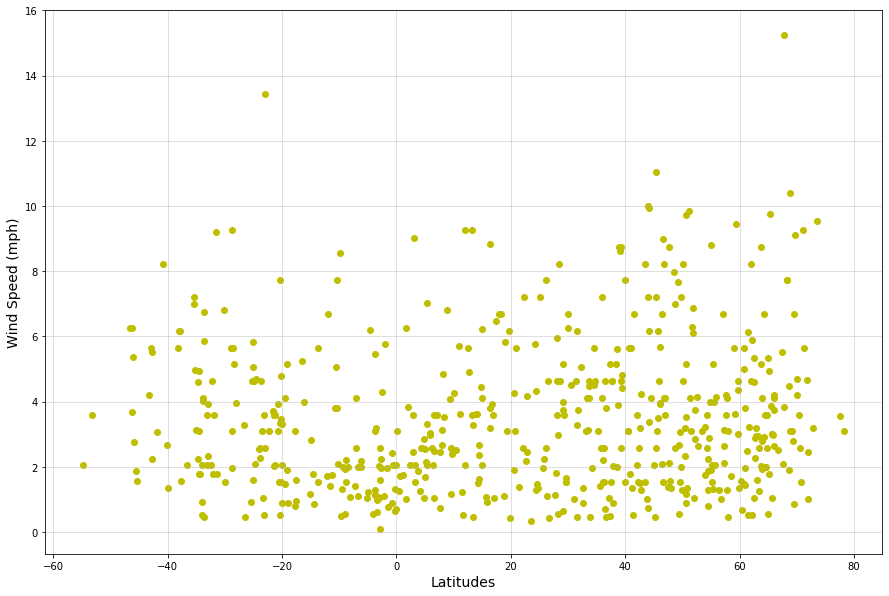

In [143]:
plt.figure(figsize=(15,10))
y_axis = weather_df['wind']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='y')
plt.grid(True, alpha=0.5)
plt.ylabel('Wind Speed (mph)', size=14)
plt.xlabel('Latitudes', size=14)
plt.show()

In [149]:
north_hemi_df = weather_df[(weather_df.lat>=0)]
north_hemi_df.head(20)

,cities,lat,lng,temp,humidity,cloudiness,wind
3,kungurtug,50.5994,97.5228,-3.57,89,100,1.17
4,cairo,30.0626,31.2497,16.83,72,0,6.69
6,nyurba,63.2842,118.332,-5.48,72,100,2.94
7,dingzhou,38.5131,114.996,16,72,40,2
8,lompoc,34.6391,-120.458,9.75,76,85,4.63
9,tuktoyaktuk,69.4541,-133.037,-11,79,90,6.69
12,burns lake,54.2331,-125.753,17,20,84,3.6
13,baijiantan,45.6333,85.1833,10.63,49,87,3.51
14,cabo san lucas,22.8909,-109.912,21.63,73,1,2.47
18,qaanaaq,77.484,-69.3632,-17.72,71,100,3.55


In [150]:
south_hemi_df = weather_df[(weather_df.lat<0)]
south_hemi_df.head(20)

,cities,lat,lng,temp,humidity,cloudiness,wind
0,alofi,-19.0595,-169.919,30,70,18,5.14
2,bredasdorp,-34.5322,20.0403,15,94,100,3.09
5,ushuaia,-54.8,-68.3,7,53,20,2.06
15,richards bay,-28.783,32.0377,17.83,90,8,1.95
16,quatre cocos,-20.2078,57.7625,25.18,83,75,1.54
17,saint-philippe,-21.3585,55.7679,21.97,88,90,3.6
19,yulara,-25.2406,130.989,24,17,0,4.63
22,atuona,-9.8,-139.033,27.1,74,17,8.56
23,busselton,-33.65,115.333,18.36,66,0,0.45
29,punta arenas,-53.15,-70.9167,3,75,0,3.6


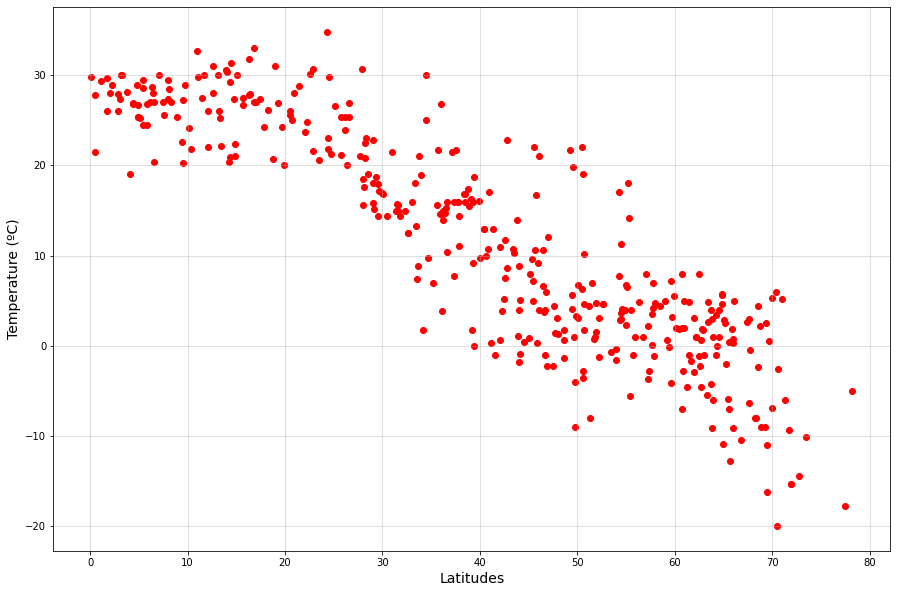

In [151]:
plt.figure(figsize=(15,10))
y_axis = north_hemi_df['temp']
x_axis = north_hemi_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='r')
plt.grid(True, alpha=0.5)
plt.ylabel('Temperature (ºC)', size=14)
plt.xlabel('Latitudes', size=14)
plt.show()

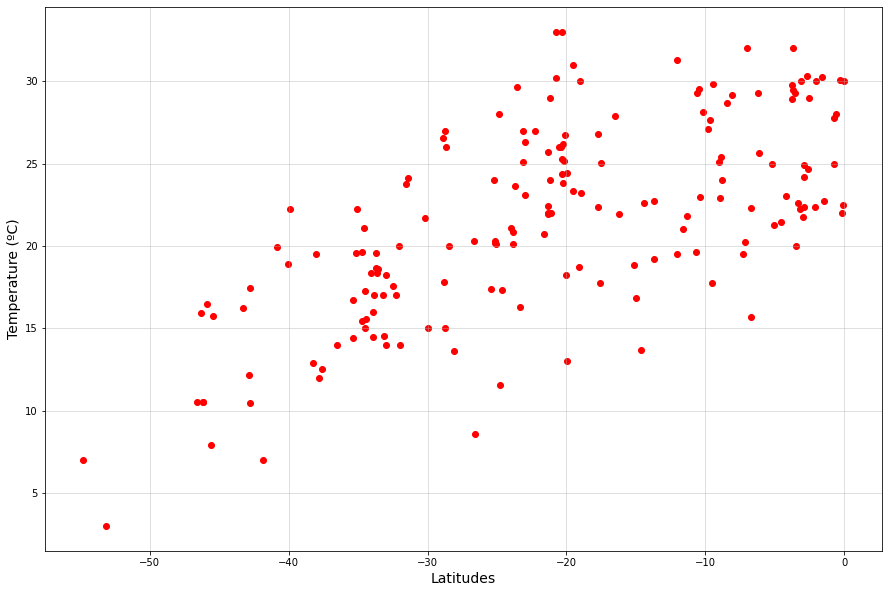

In [155]:
plt.figure(figsize=(15,10))
y_axis = south_hemi_df['temp']
x_axis = south_hemi_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='r')
plt.grid(True, alpha=0.5)
plt.ylabel('Temperature (ºC)', size=14)
plt.xlabel('Latitudes', size=14)
plt.show()

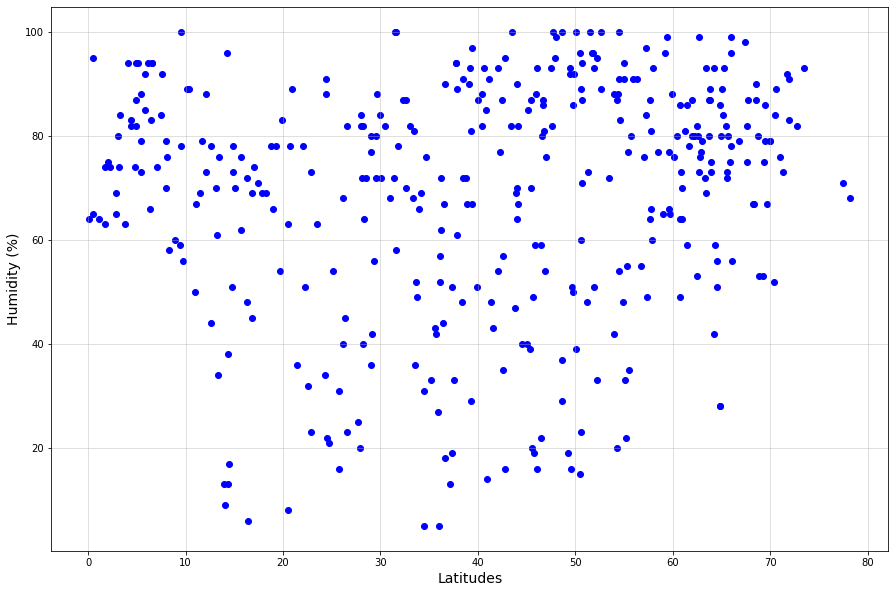

In [152]:
plt.figure(figsize=(15,10))
y_axis = north_hemi_df['humidity']
x_axis = north_hemi_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='b')
plt.grid(True, alpha=0.5)
plt.ylabel('Humidity (%)', size=14)
plt.xlabel('Latitudes', size=14)
plt.show()

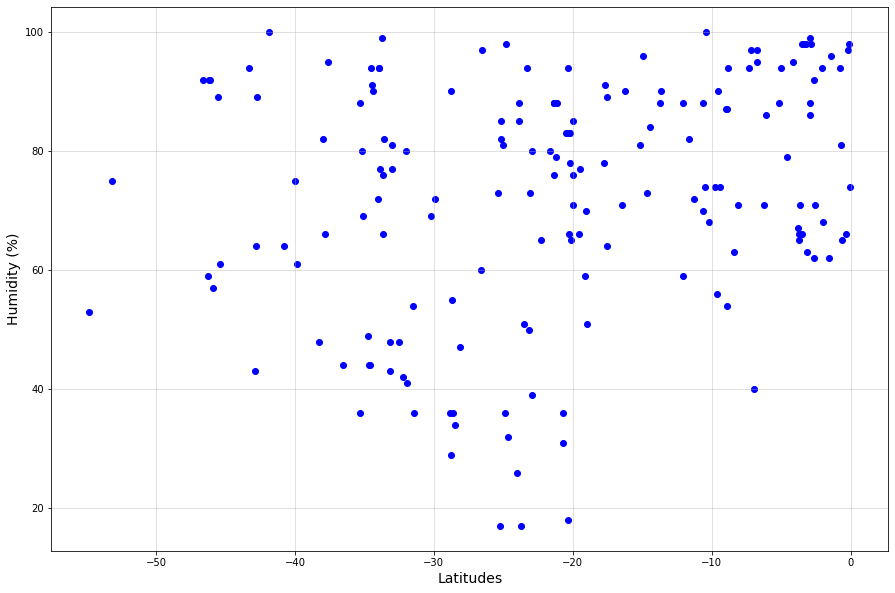

In [156]:
plt.figure(figsize=(15,10))
y_axis = south_hemi_df['humidity']
x_axis = south_hemi_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='b')
plt.grid(True, alpha=0.5)
plt.ylabel('Humidity (%)', size=14)
plt.xlabel('Latitudes', size=14)
plt.show()

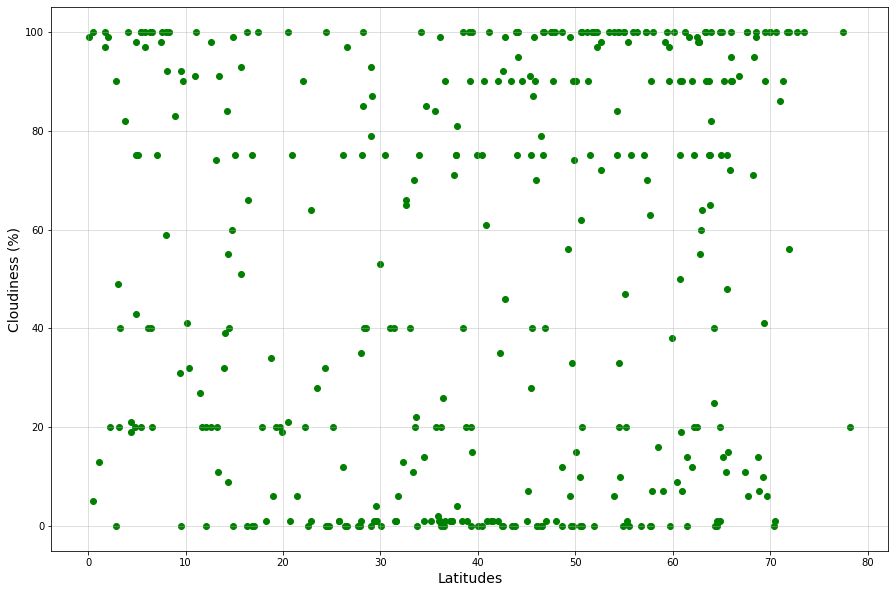

In [153]:
plt.figure(figsize=(15,10))
y_axis = north_hemi_df['cloudiness']
x_axis = north_hemi_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='g')
plt.grid(True, alpha=0.5)
plt.ylabel('Cloudiness (%)', size=14)
plt.xlabel('Latitudes', size=14)
plt.show()

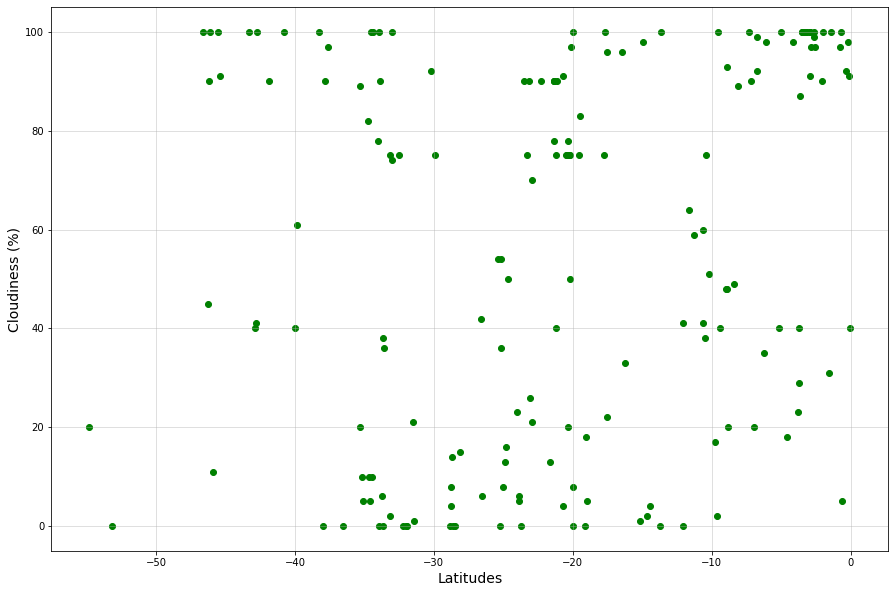

In [157]:
plt.figure(figsize=(15,10))
y_axis = south_hemi_df['cloudiness']
x_axis = south_hemi_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='g')
plt.grid(True, alpha=0.5)
plt.ylabel('Cloudiness (%)', size=14)
plt.xlabel('Latitudes', size=14)
plt.show()

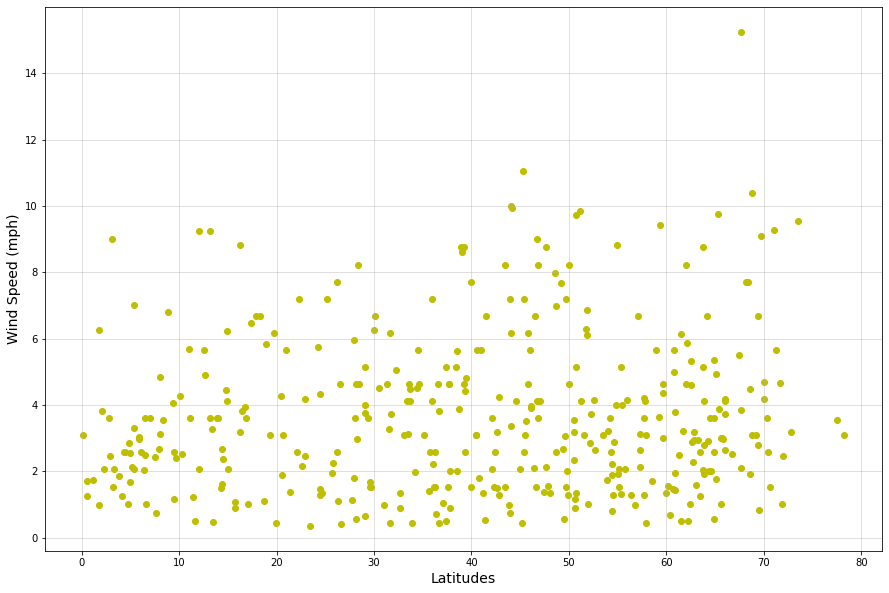

In [154]:
plt.figure(figsize=(15,10))
y_axis = north_hemi_df['wind']
x_axis = north_hemi_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='y')
plt.grid(True, alpha=0.5)
plt.ylabel('Wind Speed (mph)', size=14)
plt.xlabel('Latitudes', size=14)
plt.show()

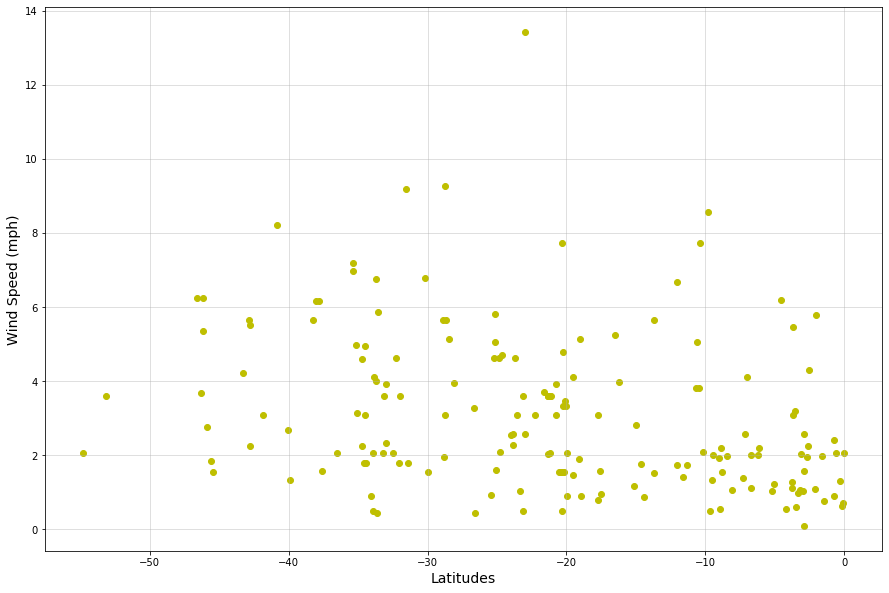

In [158]:
plt.figure(figsize=(15,10))
y_axis = south_hemi_df['wind']
x_axis = south_hemi_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='y')
plt.grid(True, alpha=0.5)
plt.ylabel('Wind Speed (mph)', size=14)
plt.xlabel('Latitudes', size=14)
plt.show()